#         EDA on Student's Performance Dataset

In [1]:
#comment
#observations

### Import requirements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [192]:
#load dataset
df1=pd.read_csv('student.csv')

In [4]:
#first 5 rows
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#last 5 rows
df1.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
#Data Types of all features

'''
gender                             -->Categorical Nominal(Nomianl or Ordinal)
race/ethnicity                     -->Categorical Nominal
parental level of education        -->Categorical Ordinal
lunch                              -->Categorical Nominal
test preparation course            -->Categorical Nominal
math score                         -->Numerical Continuous(Continuous or Discrete)
reading score                      -->Numerical Continuous
writing score                      -->Numerical Continuous
'''

'\ngender                             -->Categorical Nominal(Nomianl or Ordinal)\nrace/ethnicity                     -->Categorical Nominal\nparental level of education        -->Categorical Ordinal\nlunch                              -->Categorical Nominal\ntest preparation course            -->Categorical Nominal\nmath score                         -->Numerical Continuous(Continuous or Discrete)\nreading score                      -->Numerical Continuous\nwriting score                      -->Numerical Continuous\n'

In [25]:
#number of rows and columns
df1.shape

(1000, 8)

In [11]:
#Data Types using Python
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
#Data Type of any particular Column
df1['gender'].dtypes

dtype('O')

In [15]:
#column names
df1.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [17]:
#Column names using list comprehenssion
[feature for feature in df1.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [23]:
#Segregate Data Types(categorical) using list comprehenssion
cat_fea=[fea for fea in df1.columns if df1[fea].dtypes=='O']
cat_fea

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [24]:
#Segregate Data Types(numerical) using list comprehenssion
num_fea=[fea for fea in df1.columns if df1[fea].dtypes!='O']
num_fea

['math score', 'reading score', 'writing score']

In [30]:
#memory(in bytes) this data-set is consuming
df1.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [31]:
#total memory consumption
df1.memory_usage().sum()

64128

## Exploratory Data Analysis(EDA)

### Missing Values

In [32]:
#column-wise missing values
df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
#total missing values
df1.isnull().sum().sum()

0

### Duplicate Rows

In [35]:
#total duplicate rows in dataframe
df1.duplicated().sum()

0

### Number of Unique Values in a column

In [38]:
#number of unique values in all the columns
df1.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [42]:
#number of unique values in particular column
df1['race/ethnicity'].nunique()

5

In [43]:
#unique values in particular column
df1['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [63]:
#unique values for all columns
for fea in df1.columns:
    print(f'{fea}:{df1[fea].unique()}\n')

gender:['female' 'male']

race/ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:['standard' 'free/reduced']

test preparation course:['none' 'completed']

math score:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score:[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score:[ 74  88  93  44  75  

### Statistical Analysis
Applied only on Numerical Columns

#### describe() data

In [45]:
#Central tendencies(mean, std, count), disperssion of data(min, 25%, 50%, 75%, max)(we find by using quartiles)
df1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [50]:
#transpose
#df1.describe().transpose()
# OR
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Correlation among features(numerical)

In [53]:
#correlation between fetures
df1.corr()
#observation-->if we are good reader, then we are good writer (because correlation is 0.95...)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


#### Covariance among features(numerical)

In [54]:
#covariance between features
df1.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


#### Skewness

In [55]:
#Skewness
df1.skew()
#observation-->data looks left skewed

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

#### displot(histograms), kdeplot and distplots(combination of both) for numerical features
distribution plots(tells about how data is distributed)

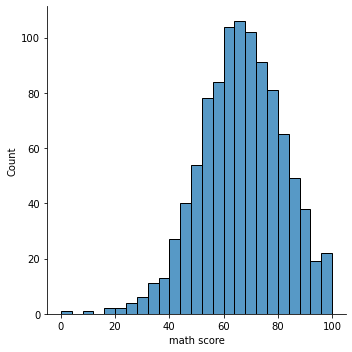

In [97]:
#displot(histogram) for 'math score'
sns.displot(df1['math score'])

<AxesSubplot:xlabel='math score', ylabel='Density'>

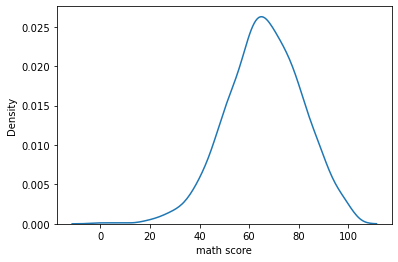

In [100]:
#kdeplot for 'math score'
sns.kdeplot(df1['math score'])

<AxesSubplot:xlabel='math score', ylabel='Density'>

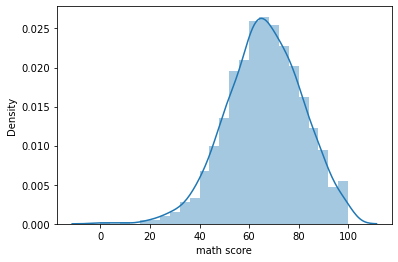

In [56]:
#distplot for 'math score'
sns.distplot(df1['math score'])
#looks left skewed

<AxesSubplot:xlabel='reading score', ylabel='Density'>

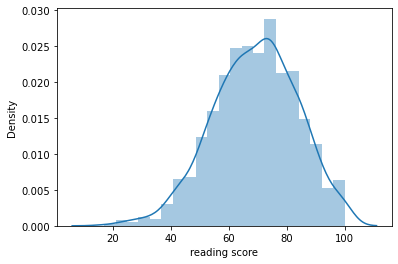

In [57]:
#distplot for 'reading score'
sns.distplot(df1['reading score'])
#looks left skewed

<AxesSubplot:xlabel='writing score', ylabel='Density'>

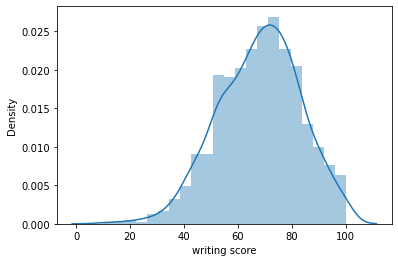

In [58]:
#distplot for 'writing score'
sns.distplot(df1['writing score'])
#looks left skewed

**all plots looks normally dsitributed**

#### row-wise average 
Numerical Columns only

In [64]:
#row-wise average of numerical fetures
(df1['math score']+df1['reading score']+df1['writing score'])/3

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [75]:
#add a new feature 'avg_score' in datafrane
df1['avg_score']=(df1['math score']+df1['reading score']+df1['writing score'])/3
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Group-by operations

In [76]:
#group-by 'gender'
df1.groupby('gender')

In [77]:
#group-by 'gender' and find mean of 'math score'
df1.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [78]:
#group-by 'gender' and find mean of all features(numerical)
df1.groupby('gender').mean()

,math score,reading score,writing score,avg_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


**Ques:** find number of students having 'math score' less than 30

In [85]:
#data of students having 'math score'<30
df1[df1['math score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [84]:
#number of students having 'math score'<30
len(df1[df1['math score']<30])

14

### Normality of features(numerical)

In [87]:
#numerical features only
num_fea

['math score', 'reading score', 'writing score']

In [90]:
#numerical data only
df1_num=df1[num_fea]
df1_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


**when p>0.05 then data will be normally distributed**

In [91]:
#normaltest from scipy.stats library
from scipy.stats import normaltest

In [92]:
#check normality of 'math score'
normaltest(df1_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [96]:
#p-value of 'math score'
normaltest(df1_num['math score'])[1]*100
#observation->since p-value=0.045<0.05 ('math score' is non-normally distributed)
#whereas in distplot it looked like it is, but it was little left-skewed.

0.04508029386993784

<AxesSubplot:xlabel='math score', ylabel='Density'>

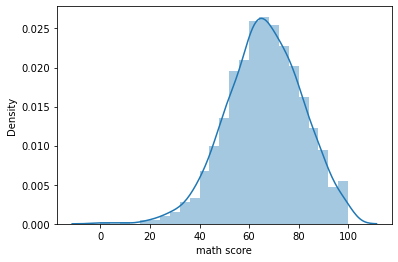

In [101]:
#distplot for 'math score'
sns.distplot(df1['math score'])
#looks left skewed

### Outlier Detection

Spread of data [Q0, Q1, Q2, Q3, Q4]=[0, 25, 50, 75, 100]percentile

Inter-Quartile Range(IQR)=Q3-Q1

upper-limit/upper-fence=Q3+1.5*IQR

lower-limit/lower-fence=Q1-1.5*IQR

In [109]:
#numerical features
num_fea

['math score', 'reading score', 'writing score']

<AxesSubplot:xlabel='math score'>

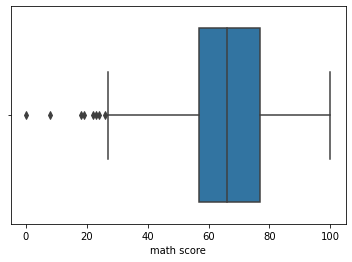

In [104]:
#outlier detection('math score') through boxplot
sns.boxplot(df1['math score']) # for horizontal plot

<AxesSubplot:>

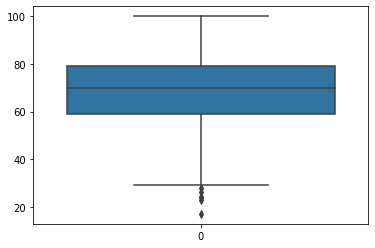

In [111]:
#outlier detection('reading score') through boxplot
sns.boxplot(data=df1['reading score']) # for vertical plot

<AxesSubplot:xlabel='writing score'>

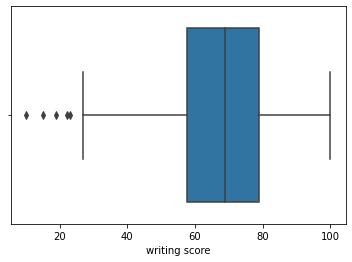

In [112]:
#outlier detection('writing score') through boxplot
sns.boxplot(df1['writing score']) # for horizontal plot

**also we have seen in distplots that plots were left skewed, and here we see plots are having left-outliers**

In [117]:
#through python(find quantiles)

print(df1['math score'].min())          #minumum value
print(df1['math score'].quantile(0.10)) #10 percentile
print(df1['math score'].quantile(0.50)) #50 percentile
print(df1['math score'].quantile(0.90)) #90 percentile
print(df1['math score'].quantile(1.00)) #100 percentile
print(df1['math score'].max())          #maximum value

#observation-->looks like very few data(10%) in between 0 and 47-->so that's why we got left-outliers.

#How this spread of data happens?
#data is first sorted in ascending order then we find percentiles as required.

0
47.0
66.0
86.0
100.0
100


In [121]:
#outlier detection through python(find min, max, q1, q3, IQR, lower-fence, upper-fence and finally outliers)
min_=df1['math score'].min()
max_=df1['math score'].max()
q1=df1['math score'].quantile(0.10) #we can set q1 to 25 percentile also(its upto us)
q3=df1['math score'].quantile(0.90) #we can set q3 to 75 percentile also(its upto us)
IQR=q3-q1
lower_fence=q1-(1.5*IQR)
upper_fence=q3+(1.5*IQR)

In [123]:
#print all values
print(f'min:{min_}, max:{max_}, q1:{q1}, q3:{q3}, IQR:{IQR}, lower limit:{lower_fence}, upper limit:{upper_fence}')
#observation-->minimum value=0 and lower limit=-11.5(no outliers)
#observation-->maximum value=100 and upper limit=144.5(no outliers

#so we need to change percentiles(q1 and q2)

min:0, max:100, q1:47.0, q3:86.0, IQR:39.0, lower limit:-11.5, upper limit:144.5


In [119]:
#outliers?-->means data<lower_fence or data>upper_fence

In [130]:
#create a function to get lower and upper limits of all numerical columns
def get_iqr(data, columns, q1_perc, q3_perc):
    for fea in columns:
        min_=data[fea].min()
        max_=data[fea].max()
        q1=data[fea].quantile(q1_perc)
        q3=data[fea].quantile(q3_perc)
        iqr=q3-q1
        lower_fence=q1-(1.5*iqr)
        upper_fence=q3+(1.5*iqr)
        print(f'feature:{fea}-->min:{min_}, max:{max_}, lower limit:{lower_fence}, upper limit:{upper_fence}\n')
        

In [131]:
get_iqr(df1, num_fea, 0.25, 0.75)

feature:math score-->min:0, max:100, lower limit:27.0, upper limit:107.0

feature:reading score-->min:17, max:100, lower limit:29.0, upper limit:109.0

feature:writing score-->min:10, max:100, lower limit:25.875, upper limit:110.875



In [141]:
#to drop outliers data?

### Graphical Analysis

In [143]:
#data first 5 rows
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


#### Univariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

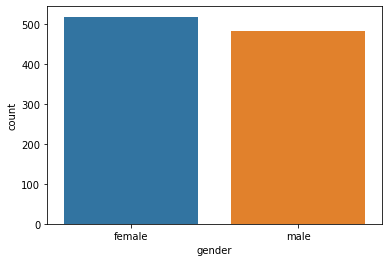

In [146]:
#countplot --> 'gender'
sns.countplot(df1['gender'])
#observation-->balanced data

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

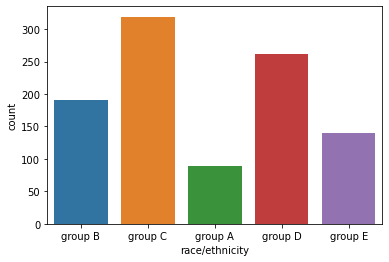

In [145]:
#countplot --> 'gender'
sns.countplot(df1['race/ethnicity'])
#observation-->imbalanced data

#### Bivariate Analysis

In [149]:
#groupby operation on gender
df1_gender=df1.groupby('gender').mean()
df1_gender

,math score,reading score,writing score,avg_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [154]:
#math score and avg_score for female and male

#female
print(df1_gender['math score'][0])
print(df1_gender['avg_score'][0])

#male
print(df1_gender['math score'][1])
print(df1_gender['avg_score'][1])

63.633204633204635
69.56949806949811
68.72821576763485
65.83748271092671


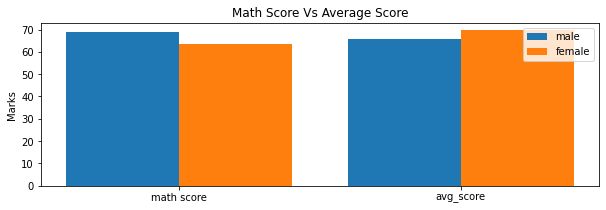

In [160]:
#bivarite analysis (math score, avg_score) for gender
plt.figure(figsize=(10,3))
X=['math score', 'avg_score']
female_score=df1_gender['math score'][0], df1_gender['avg_score'][0]
male_score  =df1_gender['math score'][1], df1_gender['avg_score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2, male_score, 0.4, label='male')
plt.bar(X_axis+0.2, female_score, 0.4, label='female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Math Score Vs Average Score")
plt.legend()
plt.show()

#### Multivariate Analysis
1. heatmap
2. pairplot
3. violinplot

In [163]:
#numerical data only
df1_num=df1[num_fea]
df1_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [183]:
#correlation between numerical features
df1_num.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

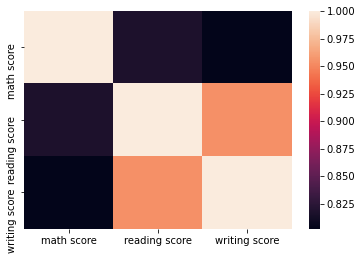

In [182]:
#heatplot(onlt numerical data)
sns.heatmap(df1_num.corr())

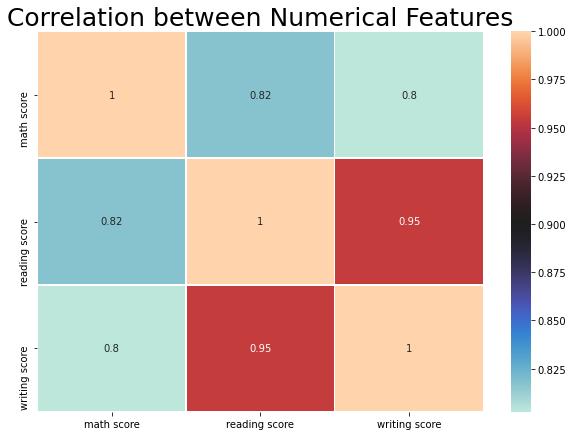

In [181]:
#heatplot(onlt numerical data) with styling
sns.heatmap(df1_num.corr(), annot=True, cmap='icefire', linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.title("Correlation between Numerical Features", size=25, color='black')
plt.show()

#cmap-->color combinations
#annot=True-->percentages show
#linewidths-->white spacing lines bw boxes

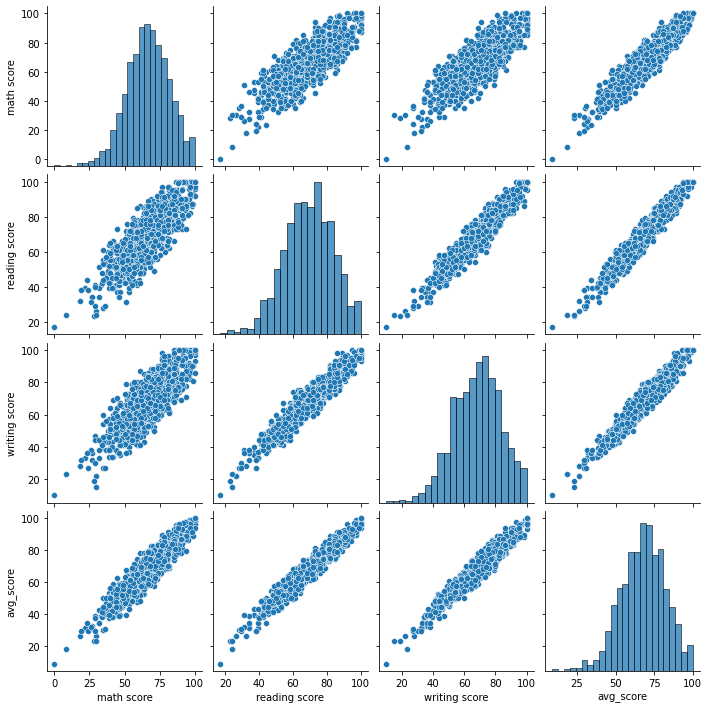

In [184]:
#pairplot(numerical features), we can change types of plots in diagonal and non-diagonal
sns.pairplot(df1)

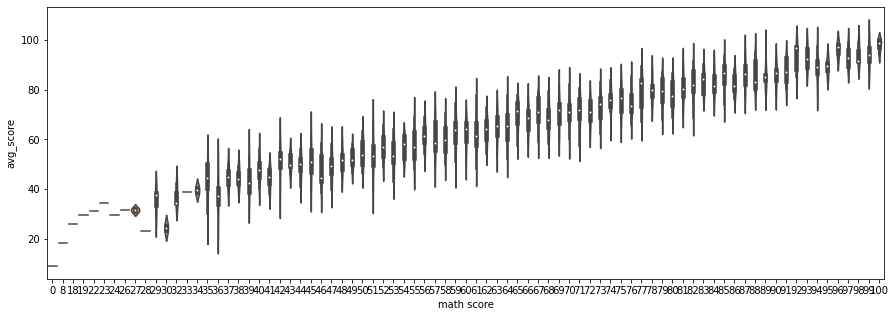

In [188]:
#violinplot of 'math score' wrt 'avg_score', shows distribution of data wrt each other
plt.figure(figsize=(15,5))
sns.violinplot(data=df1, x=df1['math score'], y=df1['avg_score'])
plt.show()

<AxesSubplot:>

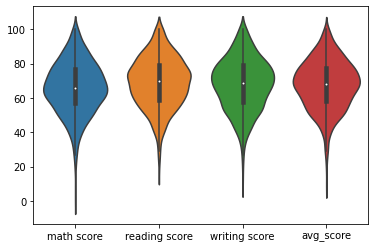

In [191]:
#violinplot for all numerical features, shows distribution of data in a range
sns.violinplot(data=df1)
#observation-->outlier seems to be in lower side because of less data distribution

**End of Document**